<a href="https://colab.research.google.com/github/Kyle-t-Schmidt/pytorchRefresher/blob/main/Simple_NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as f
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# Create a Model Class that inherits nn.Module
class model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden layer 1 (number of nuerons) -->
  # H2 (n) -->
  # output (3 classes of Iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = self.out(x)

    return x


In [47]:
# pick a seed for randomization
torch.manual_seed(41)

# create an instance of our model
model = model()

In [48]:
# import iris dataset
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [49]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [50]:
# encode variety column
le = LabelEncoder()

my_df['variety'] = le.fit_transform(my_df['variety'])
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [51]:
# train test split

X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [52]:
# convert from pandas to np

X = X.values
y = y.values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [54]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# convert y labels to tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [55]:
# Set the criterion of model to measure the error
criterion = nn.CrossEntropyLoss()

# choose optimizer - Adam and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [56]:
# Train our model
# number of epochs?
epochs = 100
losses = []
for i in range(epochs):
  # Go forwad and get a prediction
  y_pred = model.forward(X_train) # get predicted results

  # measure loss/error
  loss = criterion(y_pred, y_train)

  # keep track of losses
  losses.append(loss.detach().numpy())

  # print every 10  epochs
  if i % 10 ==0:
    print(f'Epoch: {i} and loss: {loss}')

  # back propogation: take the eror rate of forward propogation and feed it back
  # through the netwoek to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347674369812
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651507973671
Epoch: 90 and loss: 0.06522614508867264


Text(0.5, 0, 'Epoch')

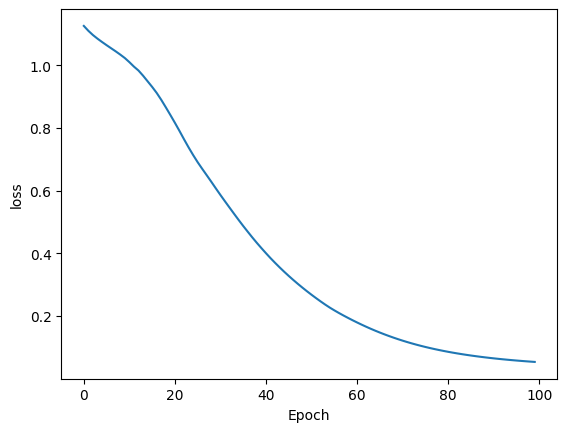

In [57]:
# plot the loss function
plt.plot(range(epochs), losses)
plt.ylabel("loss")
plt.xlabel('Epoch')